Zipf’s law:     r * freq = A * N r = word rank freq = word frequency A = constant. N = total number of words in collections 
Learn and understand Zipf’s Law. 
 Pick any file (or files) in NLTK package.
 Prove if Zipf’s Law works in Natural Language or not. 

In [16]:
import nltk
from nltk.corpus import gutenberg
print(gutenberg.fileids())
import glob

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [231]:
path =  nltk.data.find('corpora/gutenberg/austen-sense.txt')
data = glob.glob(path)
for words in data:
    with open(words) as text:
        t = text.read()  

In [232]:
import re
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',t )

#print(words)
N = len(words) # N = total number of words in the file
print(N)

90180


In [233]:
d=dict()
for c in words:
    if c not in d:
        d[c]=1
    else:
        d[c] += 1

sorted_words = sorted(d.items(), key = lambda x : x[1] ,reverse = True)
#print('Words and their frequency is : ' + str(sorted_words))

In [234]:
import csv
with open(('austen-sense.csv'), 'w', newline="") as csvfile:
            csv_output = csv.writer(csvfile)
            csv_output.writerow(['Word', 'Freq', 'Rank'])
            rank = 1
            for row in sorted_words:
                csv_output.writerow([row[0], row[1], rank])
                rank +=1
                csvfile.close


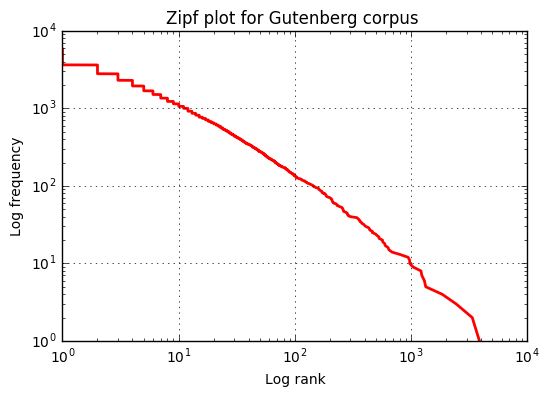

In [236]:
import matplotlib.pyplot as plt
csvfile = open('austen-sense.csv', 'r')
w=[]
f=[]
r=[]
csv_f=csv.reader(csvfile)
for row in csv_f:
    w.append(row[0])
    f.append(row[1])
    r.append(row[2])
r.pop(0)
f.pop(0)
plt.loglog(f,r,color='r',linewidth=2)
plt.grid(True)
plt.title("Zipf plot for Gutenberg corpus ")
plt.xlabel("Log rank")
plt.ylabel("Log frequency")
plt.show()